In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot,plot
from plotly.subplots import make_subplots
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart_disease_uci.csv')

In [3]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


# Columns Description:


id: (Unique id for each patient)

age: (Age of the patient in years)

origin: (place of study)

sex: (Male/Female)

cp: chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])

trestbps: resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))

chol: (serum cholesterol in mg/dl)

fbs: (if fasting blood sugar > 120 mg/dl)

restecg: (resting electrocardiographic results)

thalach: maximum heart rate achieved

exang: exercise-induced angina (True/ False)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment

ca: number of major vessels (0-3) colored by fluoroscopy

thal: [normal; fixed defect; reversible defect]

num: the predicted attribute

# Exploring the Dataset

In [4]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [7]:
df.duplicated().sum()

0

Cleaning the Data

First: Dealing with Null Values

In [8]:
# Numeric columns: Use median imputation

numeric_columns = ['trestbps', 'chol', 'thalch', 'oldpeak']
numeric_imputer = SimpleImputer(strategy='median')
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])


In [9]:
# Categorical columns with mode imputation

categorical_columns = ['fbs','restecg','exang','slope','thal']
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

In [10]:
# Columns with a significant amount of missing data

# Removing 'ca' due to hight missing values
# print(df.columns)
df.drop(['ca'], axis=1, inplace=True)

In [11]:
# Checking null values
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

Second: Dealing With Outliers

In [12]:
numerical_columns = df.select_dtypes(exclude=object).columns.tolist()

for col in numerical_columns:
    upper_limit = df[col].mean() + 3 * df[col].std()
    lower_limit = df[col].mean() - 3 * df[col].std()
    df = df[(df[col] <= upper_limit) & (df[col] >= lower_limit)]

In [13]:
# Checking Outliers

df.describe()

,id,age,trestbps,chol,thalch,oldpeak,num
count,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000,901.000000
mean,461.128746,53.497225,131.619312,199.139845,137.819090,0.826748,0.975583
std,266.028351,9.447942,17.045769,106.812517,25.029616,0.997634,1.130124
min,1.000000,28.000000,80.000000,0.000000,63.000000,-2.000000,0.000000
25%,233.000000,47.000000,120.000000,179.000000,120.000000,0.000000,0.000000
50%,460.000000,54.000000,130.000000,223.000000,140.000000,0.500000,1.000000
75%,692.000000,60.000000,140.000000,266.000000,156.000000,1.500000,2.000000
max,920.000000,77.000000,185.000000,518.000000,202.000000,4.000000,4.000000


Third: Deleting Unnecessary Columns

In [14]:
df.drop('id',axis=1, inplace=True)
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,normal,0


# Analysis and Visualization

Query_1: Distribution of Age among Patients with and without Heart Disease

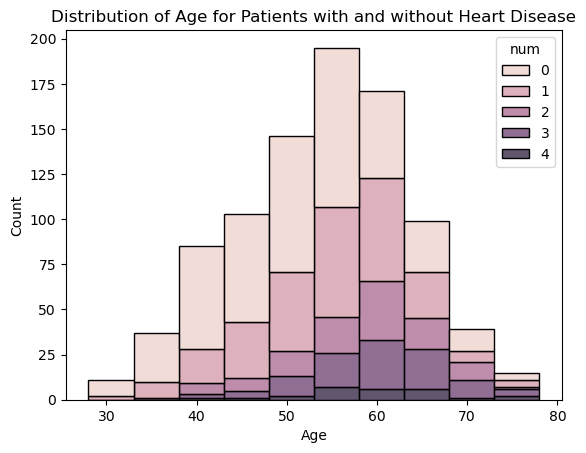

In [15]:
sns.histplot(data=df, x='age', hue='num', multiple='stack', binwidth=5)
plt.title('Distribution of Age for Patients with and without Heart Disease')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

We can notice that people between the age of 40 and 70 are the most affected by heart disease

Query 2: Heart Disease Prevalence by Sex

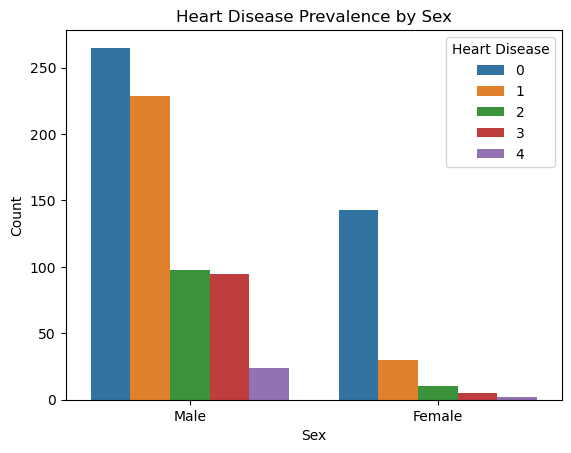

In [16]:
sns.countplot(data=df, x='sex', hue='num')
plt.title('Heart Disease Prevalence by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['0','1','2','3','4'])
plt.show()

We can notice that men are more susceptible to heart disease at all levels

Query 3: Relationship between Cholesterol Levels and Heart Disease

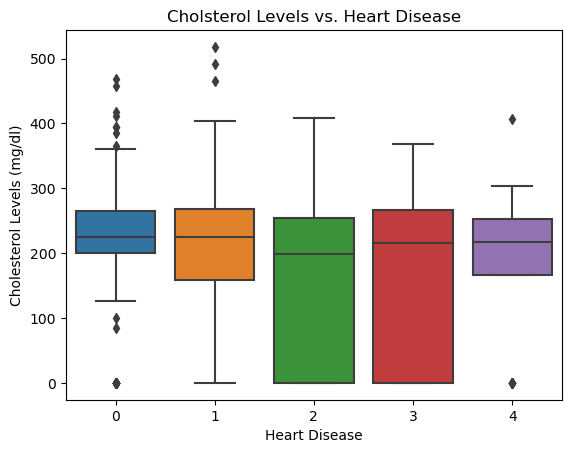

In [17]:
sns.boxplot(data=df, x='num', y='chol')
plt.title('Cholsterol Levels vs. Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol Levels (mg/dl)')
plt.xticks([0, 1, 2, 3, 4], ['0','1','2','3','4'])
plt.show()

The box plot illustrates cholesterol levels across five heart disease categories, showing median values, range variability, and outliers.
Categories 1 to 4 have similar medians, but the spread and outliers differ, with category 0 showing the most variability

Query 4: Maximum Heart Rate and Heart Disease

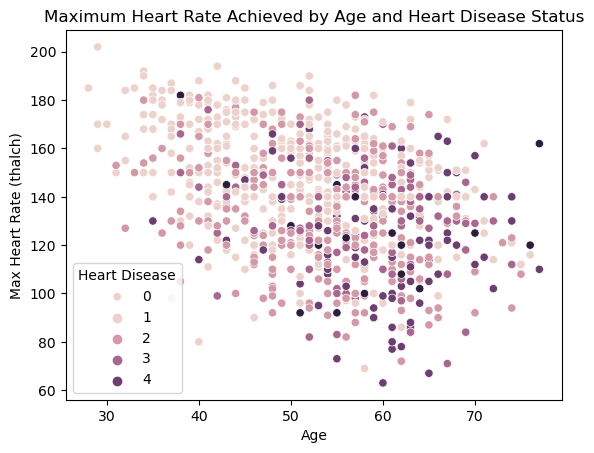

In [18]:
sns.scatterplot(data=df, x='age', y='thalch', hue='num')
plt.title('Maximum Heart Rate Achieved by Age and Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate (thalch)')
plt.legend(title= 'Heart Disease', labels=['0', '1', '2', '3', '4'])
plt.show()

The plot shows a negative correlation where maximum heart rate tends to decrease as age increases

Query 5: The lmpact of Exercise-Induced Angina on Heart Disease

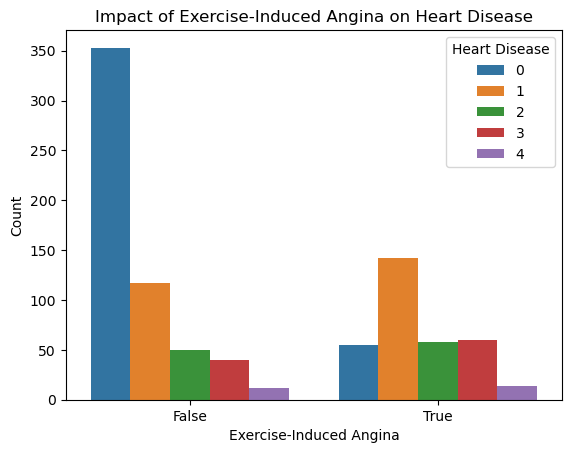

In [19]:
sns.countplot(data=df, x='exang', hue='num')
plt.title('Impact of Exercise-Induced Angina on Heart Disease')
plt.xlabel('Exercise-Induced Angina')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['0','1','2','3','4'])
plt.show()

Most cases in category 0 do not report angina, while categories 1 through 4 show a more varied distribution, with both angina and non-angina cases present. The data suggests that exercise-induced angina is more commonly reported in individuals with heart disease categories 1 to 4 compared to category 0.

Query 6: Average Resting Blood Pressure by Heart Disease Status

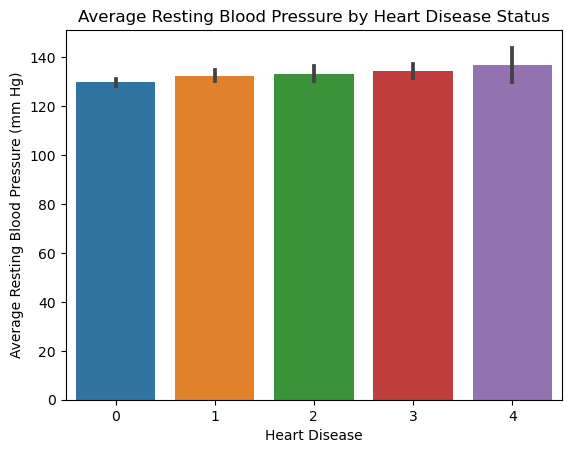

In [20]:
sns.barplot(data=df, x='num', y='trestbps')
plt.title('Average Resting Blood Pressure by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('Average Resting Blood Pressure (mm Hg)')
plt.xticks([0, 1, 2, 3, 4], ['0','1','2','3','4'])
plt.show()

All categories show similar average blood pressure ranging slightly above 120 mm Hg. The error bars indicate some variability in the measurements, with a slight trend toward increasing variability from status 0 to 4

Query 7: Distribution of Chest Pain Type among Patients

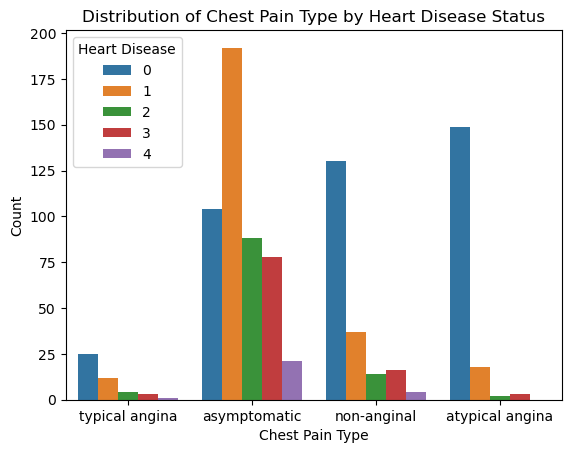

In [21]:
sns.countplot(data=df, x='cp', hue='num')
plt.title('Distribution of Chest Pain Type by Heart Disease Status')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['0', '1', '2', '3', '4'])
plt.show()

'Asymptomatic' is the most common type of chest pain across all heart disease statuses except for status 0, where 'typical angina' is more prevalent. 'Non-angina' is relatively less common across all statuses

Query 8: Fasting Blood Sugar and Heart Disease

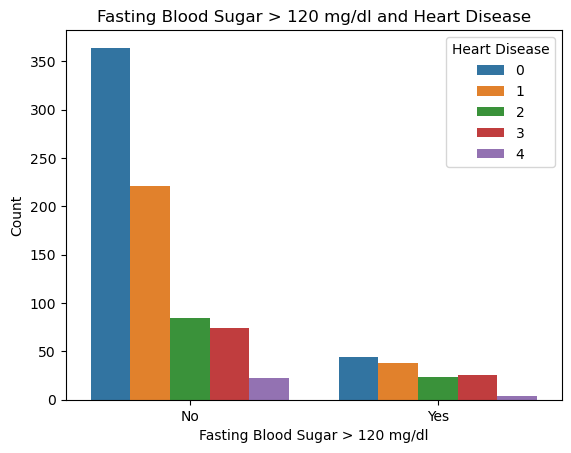

In [22]:
sns.countplot(data=df, x='fbs', hue='num')
plt.title('Fasting Blood Sugar > 120 mg/dl and Heart Disease')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['0','1', '2', '3', '4'])
plt.xticks([0,1],['No', 'Yes'])
plt.show()

The majority of individuals across all heart disease statuses have fasting blood sugar levels at or below 120 mg/dl. For those with higher blood sugar levels, the counts are notably lower, suggesting that elevated fasting blood sugar is less common among these individuals regardless of their heart disease status

Query 9: Heart Disease Prevalence by Resting Electrocardiographic Results

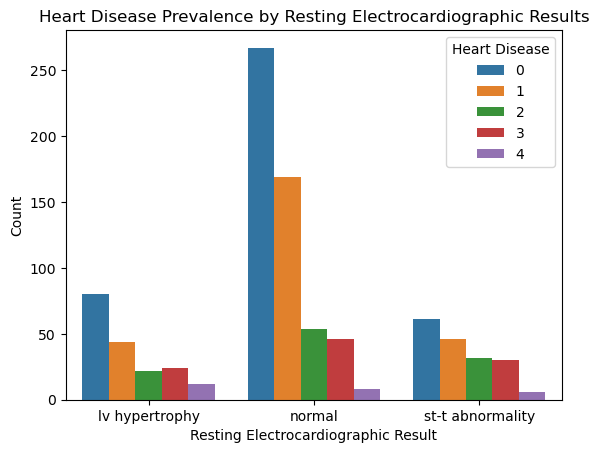

In [23]:
sns.countplot(data=df, x='restecg', hue='num')
plt.title('Heart Disease Prevalence by Resting Electrocardiographic Results')
plt.xlabel('Resting Electrocardiographic Result')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['0', '1', '2', '3', '4'])
plt.show()

Most individuals with a normal ECG result fall into the '0' heart disease category, indicating no presence of heart disease. In contrast, those with ST-T abnormalities show a highher count of heart disease statuses 1 through 4. Left ventricular hypertrophy is less common but shows some presence across all heart disease categories.